### Logistic Regression

$\hat y = \frac{1}{1+e^{-(wX+b)}}$  

$Pr(y_i=1) = f(x) = \frac{1}{1+e^{-(wX+b)}} = \hat y$  
$Pr(y_i=0) = 1-f(x) = 1 - \hat y$

用maximum likelihood  
$J(w,b) = \displaystyle\prod_{i=1}^m (\hat y_i )^y_i(1-\hat y_i)^{(1-y_i)}$  
取log  
$J(w,b)  = \displaystyle\sum_{i=1}^m y_i*log(\hat y_i )+(1-y_i)*log(1-\hat y_i)$  
求$\frac{\partial J}{\partial w_j}$:  
> $g'(x) = \frac{1}{1+e^{-x}}$對x微分= 對$(1+e^{-x})^{-1}$微分=$(-1)*(1+e^{-x})^{-2}*e^{-x}*(-1) = \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}}=g(x)(1-g(x))$  
> 對於$y_i*log(\hat y_i )$  
> 因為$\hat y_i = \frac{1}{1+e^{-(wX_i+b)}}$,  
所以$\frac{\partial y_i log(\hat y_i)}{\partial w_j}$
$= \frac{\partial y_i log(\frac{1}{1+e^{-(wX_i+b)}})}{\partial \frac{1}{1+e^{-(wX_i+b)}}}*\frac{\partial \frac{1}{1+e^{-(wX_i+b)}}}{\partial (wX_i+b)} *\frac{\partial (wX_i+b)}{\partial w_j} = -y_i*(1-\hat y)*x_{ij} = -x_{ij}(y_i-y_i\hat{y_i})$  
所以$\frac{\partial (1-y_i) log(1-\hat{y_i})}{\partial w_j} = (1-y_i)\frac{\partial log(1-\hat{y_i})}{\partial (1-\hat {y_i})}\frac{\partial (1-\hat{y_i})}{\partial x_i} \frac{\partial x_i}{\partial w_j} = -(y_i - 1)*\hat{y_i}*x_{ij}= -x_{ij}(y_i\hat{y_i}-\hat {y_i})$  
可得$\frac{\partial J}{\partial w_j} = \displaystyle\sum_{i=1}^m x_{ij}(\hat {y_i} - {y_i})$  
所以$\triangledown_w J = \displaystyle\sum_{i=1}^m x_j^{(i)}(\hat y^{(i)} - { y^{(i)}}) $

求$\frac{\partial J}{\partial b}$:  
> $x_{ij}\to 1$ 得到 $\triangledown_b J = \displaystyle\sum_{i=1}^m (\hat y^{(i)} - { y^{(i)}})$

Update:  
$w^{(k+1)} = w^{(k)} - \eta \triangledown_w J$  
$b^{(k+1)} = b^{(k)} - \eta \triangledown_b J$

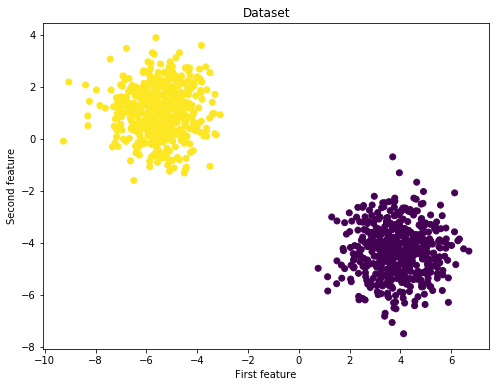

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

# We will perform logistic regression using a simple toy dataset of two classes
X, y = make_blobs(n_samples= 1000, centers=2)
#1000筆有500筆y=0,500筆y=1
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [95]:
def sigmoid(x):
    return 1 / (1+np.exp(-1*x))

def loss_function(y,y_hat):
    return -1./float(len(y))*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    
    
def train2(X, y, n_iters=10, learning_rate=0.09):
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        weights = np.zeros((n_features, 1))
        bias = 0
        costs = []
        for i in range(n_iters):
            y_predict = sigmoid(np.dot(X, weights) + bias)
            cost = (- 1 / n_samples) * np.sum(y * np.log(y_predict) + (1 - y) * (np.log(1 - y_predict)))
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y))
            print(dw.shape)
            dw0 = 1./float(len(X)) *np.sum([X[i,0]*(y_predict[i]-y[i]) for i in range(len(X))])
            dw1 = 1./float(len(X))*np.sum([X[i,1]*(y_predict[i]-y[i]) for i in range(len(X))])
            #dw = np.array([dw0,dw1])
            db = (1 / n_samples) * np.sum(y_predict - y)

            weights = weights - learning_rate * dw
            bias = bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")
    
    

def train(X,y,n_iters,learn_rate=0.009):
    w = np.zeros((len(X[0]),1),dtype=float)
    b = 0
    loss = []
    for i in range(n_iters):
        y_hat = sigmoid(np.dot(X,w)+ b)
        loss.append(loss_function(y,y_hat))
        dw0 = 1./float(len(X)) *np.sum([X[i,0]*(y_hat[i]-y[i]) for i in range(len(X))])
        dw1 = 1./float(len(X))*np.sum([X[i,1]*(y_hat[i]-y[i]) for i in range(len(X))])
        dw = [dw0, dw1]
        db =  1./float(len(X))*np.sum([y_hat[i]-(y[i]) for i in range(len(X))])
        w = w - [learn_rate *val for val in dw]
        b -= learn_rate * db
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {loss_function(y,y_hat)}")
            
train2(X_train,y_train)




(2, 1)
Cost after iteration 0: 0.6931471805599453
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)
(2, 1)


In [126]:
a= np.array([[1,2],[3,4],[5,6]])
b = np.array([2,1,1])
c = np.array([2,1])
#np.dot(a.T, np.array([1,1,1]))
#a=3x2 b = 3,1
# dot(aT,b) = 
#a.T*b
#np.dot(a.T,b)


NameError: name 'q' is not defined